In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
data = pd.DataFrame([
    {'Model':'Tiny', 'mAP':35.60, 'K': 10, 'Storage': 0.9},
    {'Model':'Tiny', 'mAP':36.47, 'K': 20, 'Storage': 1.8},
    {'Model':'Tiny', 'mAP':36.54, 'K': 40, 'Storage': 3.6},
    {'Model':'Tiny', 'mAP':36.89, 'K': 100, 'Storage': 8.2},
    {'Model':'Tiny', 'mAP':36.93, 'K': 527, 'Storage': 43},

    {'Model':'Mini', 'mAP':37.57, 'K': 10, 'Storage': 0.9},
    {'Model':'Mini', 'mAP':38.50, 'K': 20, 'Storage': 1.8},
    {'Model':'Mini', 'mAP':38.82, 'K': 40, 'Storage': 3.6},
    {'Model':'Mini', 'mAP':38.94, 'K': 100, 'Storage': 8.2},
    {'Model':'Mini', 'mAP':38.98, 'K': 527, 'Storage': 43},

    {'Model':'Small', 'mAP':40.91, 'K': 10, 'Storage': 0.9},
    {'Model':'Small', 'mAP':41.55, 'K': 20, 'Storage': 1.8},
    {'Model':'Small', 'mAP':41.93, 'K': 40, 'Storage': 3.6},
    {'Model':'Small', 'mAP':42.19, 'K': 100, 'Storage': 8.2},
    {'Model':'Small', 'mAP':42.48, 'K': 527, 'Storage': 43},


    {'Model':'Base', 'mAP':43.43, 'K': 10, 'Storage': 0.9},
    {'Model':'Base', 'mAP':43.97, 'K': 20, 'Storage': 1.8},
    {'Model':'Base', 'mAP':44.53, 'K': 40, 'Storage': 3.6},
    {'Model':'Base', 'mAP':44.66, 'K': 100, 'Storage': 8.2},
    {'Model':'Base', 'mAP':44.84, 'K': 527, 'Storage': 43},
                    ])
# Epoch level storage
data['Storage'] = data['Storage']*300/1024

36.93 Tiny
38.98 Mini
42.48 Small
44.84 Base


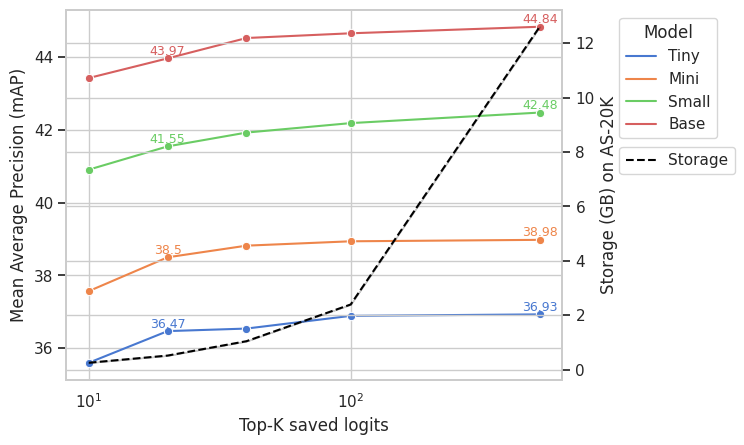

In [81]:
sns.set(style='whitegrid', palette='muted')
palette = sns.color_palette('muted')
ax= sns.lineplot(data=data, x= 'K', y='mAP', hue='Model',marker='o')
ax.set(xscale='log') 
ax2 = plt.twinx()
sns.lineplot(data=data, x= 'K', y='Storage', ax=ax2, color='black', linestyle='--')
ax.set_xlabel('Top-K saved logits')
ax.set_ylabel('Mean Average Precision (mAP)')
ax2.set_ylabel('Storage (GB) on AS-20K')

topk_vals = data.groupby('Model').max('mAP').reset_index().sort_values('mAP')
idx_map = {3:0,2:2,1:1,0:3}
for (idx, row) in topk_vals.iterrows():
    print(row.mAP, row.Model)
    new_idx = idx_map[idx]
    ax.text(row.K, row.mAP+0.1, row.mAP, size=9, horizontalalignment='center', color=palette[new_idx])

k20 = data[data.K==20].sort_values('mAP').reset_index(drop=True)
idx_map = {0:0,2:2,1:1,3:3}
for (idx, row) in k20.iterrows():
    new_idx = idx_map[idx]
    ax.text(row.K, row.mAP+0.1, row.mAP, size=9, horizontalalignment='center', color=palette[new_idx])


sns.move_legend(ax, "upper left", bbox_to_anchor=(1.1, 1))
plt.legend(loc='upper right',labels=['Storage'])
sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1.1, 0.65))
plt.savefig('plot_topk_storage.pdf',bbox_inches='tight')